In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as pt

#### Create a dataset

In [2]:
torch.manual_seed(71)
X = torch.linspace(1,50,50).reshape(-1,1) # Input data
e = torch.randint(-8,9,(50,1),dtype=torch.float) #some noise
print(e.sum())
Y = 2*X + e +1 # this is the actual data with some noise
print(Y.shape) 

tensor(0.)
torch.Size([50, 1])


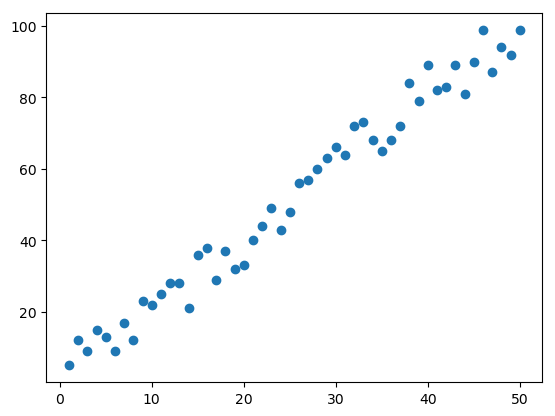

In [3]:
pt.scatter(X ,Y)

### now create the model

In [4]:
torch.manual_seed(59)
model = nn.Linear(1,1)
print(type(model.weight.item()))
print(model.bias)
x1 =torch.tensor([2.0])
print(model.forward(x1))
#the below cell does exactly same

<class 'float'>
Parameter containing:
tensor([0.9638], requires_grad=True)
tensor([1.1758], grad_fn=<AddBackward0>)


In [5]:
# create a new model which inherits nn.Module
torch.manual_seed(59)
class Model(nn.Module):
    def __init__(self,in_feature, out_feature):
        super().__init__()
        self.linear = nn.Linear(in_feature, out_feature)
    
    def forward(self,X):
        y_pred = self.linear(X)
        return y_pred
my_model = Model(1,1)
print(my_model.linear.weight)
print(my_model.linear.bias)
print(my_model.forward(x1))

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)
tensor([1.1758], grad_fn=<AddBackward0>)


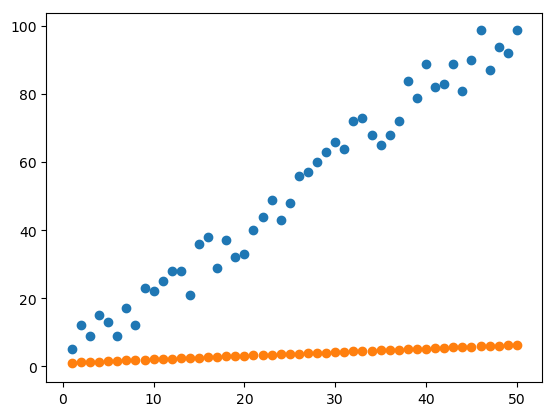

In [6]:
### Plot initial model 
x1 = np.array([X.min(),X.max()])
w1,b = my_model.linear.weight.item(),my_model.linear.bias.item()
y= X*w1+b
pt.scatter(X,Y)
pt.scatter(X,y)

### Training Model


In [7]:
#set loss-> will use Meas squared error MSE
criterion = nn.MSELoss()

#set the optimization -> will use Stochastic Gradient Descent SGD
model_params = my_model.parameters() #this will return generator
optimizer = torch.optim.SGD(model_params,lr = 0.001)

#set number of epoch
epochs = 50

#create a list of loss for each epoch
losses =[]


In [ ]:
#training

for epoch in range(epochs):
    #forwars pass -> generate y_pred with current model weights
    y_pred= my_model.forward(X)
    
    #Calculate the loss on y_pred
    loss = criterion(y_pred,Y)

    #append the loss in the losses list
    losses.append(loss)
    
    #print the loss at current epoch
    print(f"epoch {epoch}, loss:{loss}")
    
    #clear the gradient from previous backprops
    optimizer.zero_grad()
    
    #BACKPROPOGATION: backprop on the current loss <<<<<<<<<------------
    loss.backward()
    
    #update the weights
    optimizer.step()
    

In [10]:
#get the prediction from new model 
W_updated,B_updated = my_model.linear.weight.item(),my_model.linear.bias.item()
print(W_updated,B_updated)

1.9838191270828247 1.0557515621185303


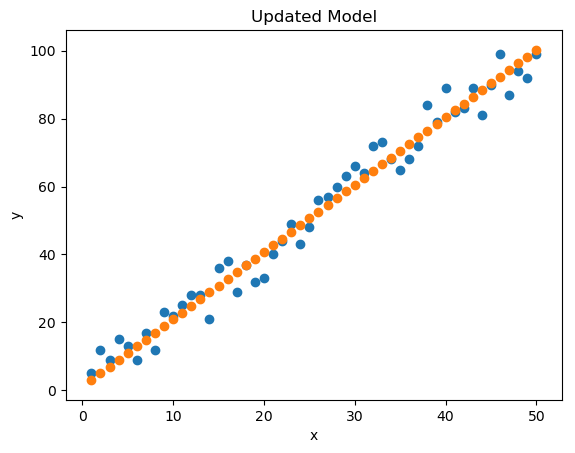

In [16]:
Y_updated = W_updated*X + B_updated
pt.scatter(X,Y)
pt.scatter(X,Y_updated)
pt.title('Updated Model')
pt.ylabel('y')
pt.xlabel('x');